In [91]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from encodings.aliases import aliases

%matplotlib inline

In [92]:
# Read csv file and remove duplicates

alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df=pd.read_csv('data/la-crime-data.csv', nrows=10, encoding=encoding)
        print('successful', encoding)
    except:
        pass


successful cp949
successful shift_jisx0213
successful cp865
successful mac_roman
successful cp1253
successful iso8859_4
successful mac_turkish
successful cp775
successful koi8_r
successful cp1256
successful big5
successful euc_jisx0213
successful cp273
successful johab
successful cp863
successful cp932
successful gb2312
successful mac_greek
successful cp852
successful cp500
successful cp037
successful shift_jis_2004
successful cp869
successful cp1026
successful cp1255
successful iso8859_10
successful iso2022_jp_3
successful cp864
successful cp1251
successful cp861
successful hz
successful ascii
successful iso2022_jp
successful cp855
successful iso8859_16
successful cp857
successful iso8859_6
successful mac_cyrillic
successful cp862
successful iso8859_11
successful cp437
successful cp1258
successful iso8859_2
successful mac_iceland
successful utf_7
successful cp1140
successful iso8859_15
successful mac_latin2
successful iso2022_jp_ext
successful iso2022_kr
successful kz1048
successful i

In [93]:
# Read the dataset and select the timestamp as an index
crime=pd.read_csv('data/la-crime-data.csv', encoding='iso8859_11')

In [94]:
# Check the amount of rown and columns in the dataset
crime.shape

(798242, 28)

In [95]:
# Count the duplicate rows in the dataset
crime.duplicated().sum()

0

## Explore the dataset

In [96]:
crime.head()

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt Dist No,Part_1-2,Crm_Cd,Crm_Cd_Desc,...,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,LOCATION,Cross_Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [97]:
crime.tail()

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt Dist No,Part_1-2,Crm_Cd,Crm_Cd_Desc,...,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,LOCATION,Cross_Street,LAT,LON
798237,231604807,01/27/2023 12:00:00 AM,01/26/2023,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
798238,231606525,03/22/2023 12:00:00 AM,03/22/2023,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
798239,231210064,04/12/2023 12:00:00 AM,04/12/2023,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
798240,230115220,07/02/2023 12:00:00 AM,07/01/2023,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485
798241,230906458,03/05/2023 12:00:00 AM,03/05/2023,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,14500 HARTLAND ST,NaN,34.1951,-118.4487


In [98]:
# Dataframe summary information
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798242 entries, 0 to 798241
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           798242 non-null  int64  
 1   Date_Rptd       798242 non-null  object 
 2   DATE_OCC        798242 non-null  object 
 3   TIME_OCC        798242 non-null  int64  
 4   AREA            798242 non-null  int64  
 5   AREA_NAME       798242 non-null  object 
 6   Rpt Dist No     798242 non-null  int64  
 7   Part_1-2        798242 non-null  int64  
 8   Crm_Cd          798242 non-null  int64  
 9   Crm_Cd_Desc     798242 non-null  object 
 10  Mocodes         688290 non-null  object 
 11  Vict_Age        798242 non-null  int64  
 12  Vict_Sex        693589 non-null  object 
 13  Vict_Descent    693581 non-null  object 
 14  Premis_Cd       798233 non-null  float64
 15  Premis_Desc     797770 non-null  object 
 16  Weapon_Used_Cd  277895 non-null  float64
 17  Weapon_Des

In [99]:
# Summary information on the columns
crime.columns

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA', 'AREA_NAME',
       'Rpt Dist No', 'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Mocodes',
       'Vict_Age', 'Vict_Sex', 'Vict_Descent', 'Premis_Cd', 'Premis_Desc',
       'Weapon_Used_Cd', 'Weapon_Desc', 'Status', 'Status_Desc', 'Crm_Cd_1',
       'Crm_Cd_2', 'Crm_Cd_3', 'Crm_Cd_4', 'LOCATION', 'Cross_Street', 'LAT',
       'LON'],
      dtype='object')

In [100]:
# Check dataframe for whether or not values are missing in columns
crime.isnull()

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt Dist No,Part_1-2,Crm_Cd,Crm_Cd_Desc,...,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,LOCATION,Cross_Street,LAT,LON
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
798238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
798239,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
798240,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False


In [101]:
# Get columns for missing values
crime.columns[np.sum(crime.isnull())!=0]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Index(['Mocodes', 'Vict_Sex', 'Vict_Descent', 'Premis_Cd', 'Premis_Desc',
       'Weapon_Used_Cd', 'Weapon_Desc', 'Crm_Cd_1', 'Crm_Cd_2', 'Crm_Cd_3',
       'Crm_Cd_4', 'Cross_Street'],
      dtype='object')

In [102]:
# Get columns with no missing values
crime.columns[np.sum(crime.isnull())==0]

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA', 'AREA_NAME',
       'Rpt Dist No', 'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Vict_Age',
       'Status', 'Status_Desc', 'LOCATION', 'LAT', 'LON'],
      dtype='object')

In [103]:
# Check for number of unique values in columns
for col in crime.columns:
    unique_count = crime[col].nunique()
    print(col+"has"+str(unique_count)+"unique values")

DR_NOhas798242unique values
Date_Rptdhas1350unique values
DATE_OCChas1350unique values
TIME_OCChas1439unique values
AREAhas21unique values
AREA_NAMEhas21unique values
Rpt Dist Nohas1202unique values
Part_1-2has2unique values
Crm_Cdhas138unique values
Crm_Cd_Deschas138unique values
Mocodeshas267117unique values
Vict_Agehas103unique values
Vict_Sexhas5unique values
Vict_Descenthas20unique values
Premis_Cdhas312unique values
Premis_Deschas306unique values
Weapon_Used_Cdhas79unique values
Weapon_Deschas79unique values
Statushas6unique values
Status_Deschas6unique values
Crm_Cd_1has140unique values
Crm_Cd_2has122unique values
Crm_Cd_3has36unique values
Crm_Cd_4has6unique values
LOCATIONhas63345unique values
Cross_Streethas9589unique values
LAThas5397unique values
LONhas4967unique values


In [122]:
#Extract datetime information from DATE_OCC column
crime.DATE_OCC=pd.to_datetime(crime.DATE_OCC)

In [123]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798242 entries, 0 to 798241
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           798242 non-null  int64         
 1   Date_Rptd       798242 non-null  object        
 2   DATE_OCC        798242 non-null  datetime64[ns]
 3   TIME_OCC        798242 non-null  int64         
 4   AREA            798242 non-null  int64         
 5   AREA_NAME       798242 non-null  object        
 6   Rpt Dist No     798242 non-null  int64         
 7   Part_1-2        798242 non-null  int64         
 8   Crm_Cd          798242 non-null  int64         
 9   Crm_Cd_Desc     798242 non-null  object        
 10  Mocodes         688290 non-null  object        
 11  Vict_Age        798242 non-null  int64         
 12  Vict_Sex        693589 non-null  object        
 13  Vict_Descent    693581 non-null  object        
 14  Premis_Cd       798233 non-null  flo

In [124]:
crime.DATE_OCC.dt.year

0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
798237    2023
798238    2023
798239    2023
798240    2023
798241    2023
Name: DATE_OCC, Length: 798242, dtype: int32

In [125]:
crime.DATE_OCC.dt.month

0         1
1         1
2         2
3         1
4         1
         ..
798237    1
798238    3
798239    4
798240    7
798241    3
Name: DATE_OCC, Length: 798242, dtype: int32

In [126]:
crime.DATE_OCC.dt.day

0          8
1          1
2         13
3          1
4          1
          ..
798237    26
798238    22
798239    12
798240     1
798241     5
Name: DATE_OCC, Length: 798242, dtype: int32

## Exploring Queries

### What are the most common crimes in terms of offense groups?


In [134]:
# Get value counts for crime code descriptions
crime.Crm_Cd_Desc.value_counts()

Crm_Cd_Desc
VEHICLE - STOLEN                                           85323
BATTERY - SIMPLE ASSAULT                                   63456
THEFT OF IDENTITY                                          50920
BURGLARY FROM VEHICLE                                      49044
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    48753
                                                           ...  
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)             4
FAILURE TO DISPERSE                                            3
GRAND THEFT / AUTO REPAIR                                      3
DISHONEST EMPLOYEE ATTEMPTED THEFT                             2
INCITING A RIOT                                                1
Name: count, Length: 138, dtype: int64

Crm_Cd_Desc
VEHICLE - STOLEN                                           0.106889
BATTERY - SIMPLE ASSAULT                                   0.079495
THEFT OF IDENTITY                                          0.063790
BURGLARY FROM VEHICLE                                      0.061440
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    0.061075
BURGLARY                                                   0.060826
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             0.057535
THEFT PLAIN - PETTY ($950 & UNDER)                         0.050978
INTIMATE PARTNER - SIMPLE ASSAULT                          0.050435
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            0.038675
Name: count, dtype: float64

Text(0.5, 0, 'Offense Groups')

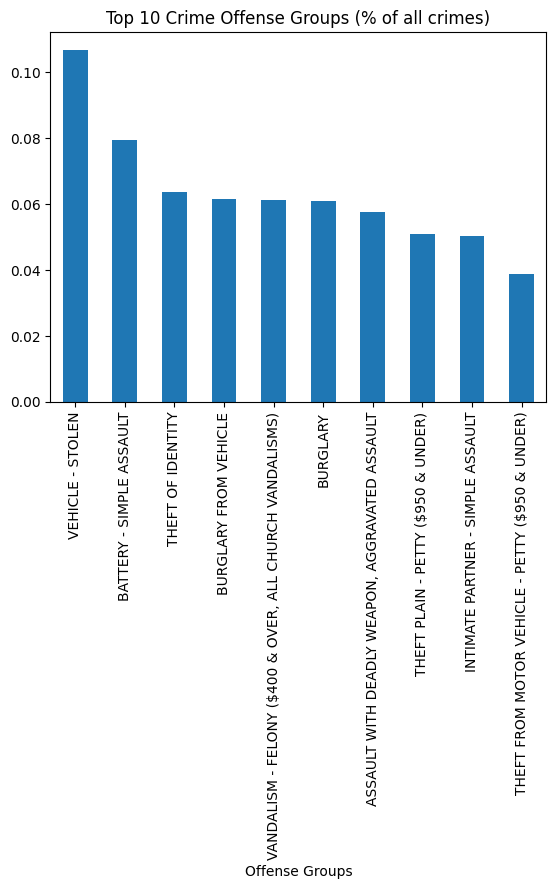

In [135]:
# Get top ten values
offense_group_vals = crime.Crm_Cd_Desc.value_counts()[:10]
display(offense_group_vals/crime.shape[0])

# Create a bar chart for the top 10 offense groups
(offense_group_vals/crime.shape[0]).plot(kind='bar');
plt.title('Top 10 Crime Offense Groups (% of all crimes)');
plt.xlabel('Offense Groups')

### What are the least common crimes in terms of offense groups?


In [106]:
# Get value counts for crime code descriptions and sort by ascending
crime.Crm_Cd_Desc.value_counts().sort_values(ascending=True)[:10]

Crm_Cd_Desc
INCITING A RIOT                                       1
DISHONEST EMPLOYEE ATTEMPTED THEFT                    2
FAILURE TO DISPERSE                                   3
GRAND THEFT / AUTO REPAIR                             3
FIREARMS RESTRAINING ORDER (FIREARMS RO)              4
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)    4
PICKPOCKET, ATTEMPT                                   5
THEFT, COIN MACHINE - ATTEMPT                         5
INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)          5
BLOCKING DOOR INDUCTION CENTER                        5
Name: count, dtype: int64

Crm_Cd_Desc
INCITING A RIOT                                       0.000001
DISHONEST EMPLOYEE ATTEMPTED THEFT                    0.000003
FAILURE TO DISPERSE                                   0.000004
GRAND THEFT / AUTO REPAIR                             0.000004
FIREARMS RESTRAINING ORDER (FIREARMS RO)              0.000005
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)    0.000005
PICKPOCKET, ATTEMPT                                   0.000006
THEFT, COIN MACHINE - ATTEMPT                         0.000006
INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)          0.000006
BLOCKING DOOR INDUCTION CENTER                        0.000006
Name: count, dtype: float64

Text(0.5, 0, 'Offense Groups')

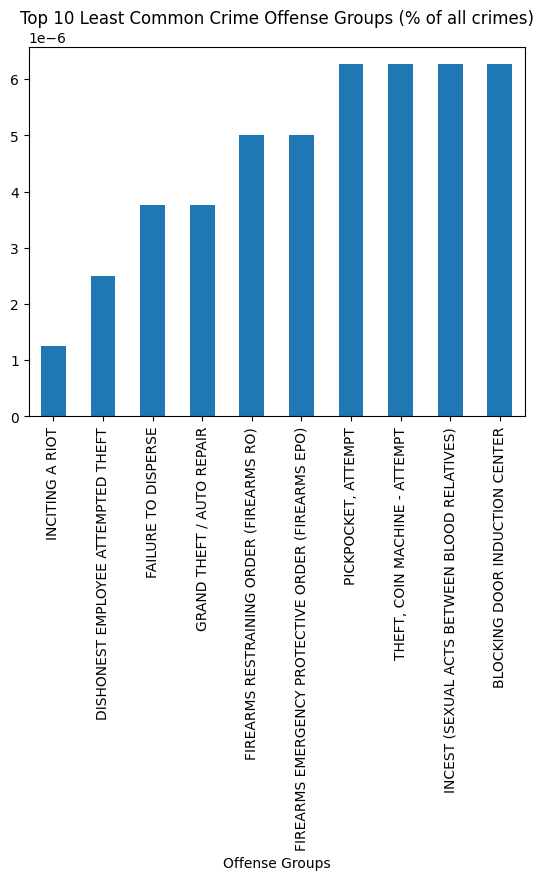

In [107]:
# Get top ten values
offense_group_vals = crime.Crm_Cd_Desc.value_counts().sort_values(ascending=True)[:10]

display(offense_group_vals/crime.shape[0])

# Create a bar chart for the top 10 least common offense groups
(offense_group_vals/crime.shape[0]).plot(kind='bar');
plt.title('Top 10 Least Common Crime Offense Groups (% of all crimes)');
plt.xlabel('Offense Groups')

### Year most crimes were committed?

In [132]:
year = crime.DATE_OCC.dt.year

crime.groupby(year).count()

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt Dist No,Part_1-2,Crm_Cd,Crm_Cd_Desc,...,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,LOCATION,Cross_Street,LAT,LON
DATE_OCC,,,,,,,,,,,,,,,,,,,,,
2020,199365,199365,199365,199365,199365,199365,199365,199365,199365,199365,...,199365,199365,199363,16352,581,17,199365,35004,199365,199365
2021,209288,209288,209288,209288,209288,209288,209288,209288,209288,209288,...,209288,209288,209286,16119,533,18,209288,36098,209288,209288
2022,234060,234060,234060,234060,234060,234060,234060,234060,234060,234060,...,234060,234060,234057,15925,523,13,234060,34470,234060,234060
2023,155529,155529,155529,155529,155529,155529,155529,155529,155529,155529,...,155529,155529,155526,10426,323,9,155529,22284,155529,155529


Text(0.5, 1.0, 'Number of crimes')

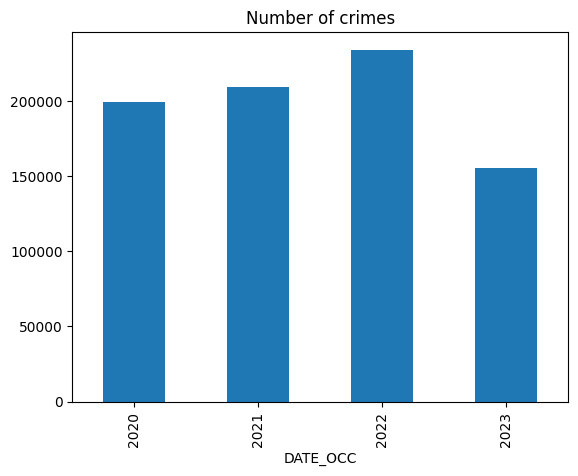

In [136]:
# Create a bar chart to visualize the data
crime.groupby(year).count()['Crm_Cd'].plot(kind='bar')
plt.title('Number of crimes')